In [1]:
import Parser, Deriver, Interpreter, Analyser2, SelfOrg
import numpy as np
import math

In [2]:
modelName = 'Young_Shrub'

In [3]:
# Have to generate manually as we want points to be same for render and stats.
# We also want to be able to access some inner stuff for plotting

In [4]:
Specification   = Parser.parse('Specifications/'+modelName+'.txt', {})

In [5]:
n               = Specification['depth']
axiom           = Specification['axiom']
tree            = [axiom]
tree            = Deriver.derive(tree,n)

In [6]:
scale = 1

In [7]:
points = []

if Specification['self_org'] == False:

    # DERIVE
    n               = Specification['depth']
    axiom           = Specification['axiom']
    tree            = [axiom]
    tree            = Deriver.derive(tree,n)

    # INTERPRET
    points, scale   = Interpreter.interpret(tree, True, return_scale=True)

else:

    # DERIVE AND INTERPRET TOGETHER
    n               = Specification['depth']
    axiom           = Specification['axiom']
    tree            = [axiom]
    num_voxels      = Specification['num_voxels']
    shadow_height   = Specification['shadow_height']
    shadow_width    = Specification['shadow_width']
    decrement_close = Specification['dec_close']
    decrement_far   = Specification['dec_far']

    for i in range(0,n):
        tree = Deriver.derive(tree,1)
        points, scale = Interpreter.interpret(tree, True, return_scale = True)
        voxels          = SelfOrg.calc_light(points,
                                             num_voxels,
                                             shadow_height,
                                             shadow_width,
                                             decrement_close,
                                             decrement_far)
        SelfOrg.update_cells(tree, voxels, scale)
        print("Interpreted for the "+str(i+1)+"th time.")

In [8]:
# So we can view what we visualised
print("writing to file...")
with open("data.dat", mode="w") as f:
    f.write(str(len(full_points))+"\n")
    for p in full_points:
        x,y,z,r,a,b,c,d,l = p
        x /= scale
        y /= scale
        y -= 0.5
        z /= scale
        r /= scale
        line = [x,y,z,r,l]
        for feature in line:
            f.write(str(feature)+"\t")
        f.write("\n")
print("done writing.")

writing to file...


NameError: name 'full_points' is not defined

In [9]:
points[0]

(0, 0, 0, 2.0, 0.0, 270.0, 0.0, 12.379514773402393, 0.0)

In [10]:
points[1]

(4.641574596504307e-32,
 12.379514773402393,
 -7.580266571122306e-16,
 1.0,
 0.0,
 270.0,
 0.0,
 12.379514773402393,
 0.0)

In [11]:
points[2]
full_points = points
full_points = np.array(points)

In [12]:
points = points[2:]

In [13]:
metrics         = Analyser2.analyse(points)

34.33990817286705
62.04815942978367
31.640936030023955
15.527919201292454
16.194500237055536
16.879595559548306
29.91316837414316
discarded 0.0
discarded 0.0
69.26535635284101
38.20091474766206
66.87516956377006
23.78363072544974
discarded 0.0
discarded 0.0
65.99305721126294
67.51537139376141
16.921791422924898
70.51546130463707
44.64429483748475
22.529177343547286
45.64271416763996
50.000340938015924
64.39572882742347
61.606848795906366
63.93365416108957
70.29544292182746
67.7605625776619
69.18574000396875
39.014344365571226
26.825788916271968
16.451584980717733
discarded 0.0
discarded 0.0
discarded 0.0
discarded 0.0
62.17106537745473
28.528333734109758
27.053392032966944
46.298737623396256
36.100710564761094
42.83884743441292
40.89048566937213
41.54855597693334
72.34692853857956
44.044525758922504
29.304540513492828
64.15466514191957
discarded 0.0
discarded 0.0
16.43815409587485
32.784812715943794
58.1927182629292
25.38115118073192
31.344190232137866
16.901257026859525
23.61927925365

In [14]:
vertices        = np.array(points)

In [15]:
for (k,v) in metrics.items():
    print(k, ':', v)

parentAngle_mean : 44.39048849179736
parentAngle_variance : 17.281164337958426
length_mean : 2.1953333850741608
length_variance : 0.9931312262284256
verticalOrientation_mean : 66.78040237934655
verticalOrientation_variance : 34.19850464431352
horizontalOrientation_mean : 190.34379004675984
horizontalOrientation_variance : 112.68222826463659
q1_xyz : (5.017958389321567, 3.2814496835002434, 3.897054207587507)
q2_xyz : (27.287135601144172, 12.672908917975915, 37.640904794331895)
q3_xyz : (26.484774986349926, 13.232767812762237, 36.208853057800226)
xyz : (30.416824709161787, 28.710977292713366, 38.99823571629543)
trunk_length : 12.379514773402393
totalBiomass : 88.39721901656995


In [16]:
math.degrees(metrics['parentAngle_mean'])

2543.38764110404

In [17]:
vertices[:,5].mean()

190.09150497756752

In [18]:
import matplotlib.pyplot as plt

In [19]:
#Fed up of accessing via numerical values
# Format of points is:
# 0--1--2--3--4--5--6--7--8
# x  y  z  r  vA hA pA l--leaf
keys = {
    'x': 0,
    'y': 1,
    'z': 2,
    'radius': 3,
    'vertical orientation': 4,
    'horizontal orientation': 5,
    'parent angle': 6,
    'length': 7,
    'leaf': 8
}

(array([216.,   0.,   0.,  50.,  62.,  50.,  60.,  54.,  50.,  60.,  58.,
         42.,  54.,  48.,  54.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
        165., 170., 175., 180.]),
 <a list of 36 Patch objects>)

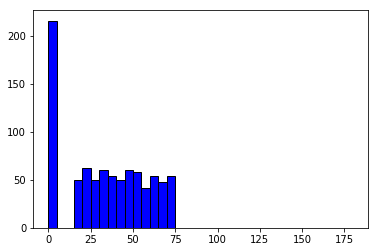

In [20]:
plt.hist(vertices[:,keys['parent angle']], color='blue', edgecolor='black', range=[0,180], bins=36)

In [ ]:
idx = np.argpartition(vertices[:,6], 30)
print(vertices[:,6][idx])

In [ ]:
max_height = np.max(vertices[:,keys['y']])

In [ ]:
lower_third  = full_points[full_points[:,keys['y']] < max_height/3]
middle_third = full_points[full_points[:,keys['y']] < 2*max_height/3]
middle_third = middle_third[middle_third[:,keys['y']] > max_height/3]
upper_third = full_points[full_points[:,keys['y']] > 2*max_height/3]

In [ ]:
points[0]

In [ ]:
plt.hist(lower_third[:,keys['y']], color='blue', edgecolor='black', bins=36)

In [ ]:
plt.hist(middle_third[:,keys['x']], color='blue', edgecolor='black', bins=36)

In [ ]:
plt.hist(upper_third[:,keys['x']], color='blue', edgecolor='black', bins=36)

In [ ]:
# Problem with these graphs is that they weight all nodes equally, regardless of size and mass
# Create metric that calculates biomass for each thing, then adds that many of itself to distribution.

weighted_ps = []

In [ ]:
vertices.shape[0]/2

In [ ]:
ps = zip(points[::2], points[1::2])

In [ ]:
points[30]

In [ ]:
weights = np.array([Analyser.volumeOfConic(r1,r2,l) for ((x,y,z,r1,va,ha,pa,l,leaf),(x2,y2,z2,r2,va2,ha2,pa2,l2,leaf)) in ps])

In [ ]:
weights.sum()

In [ ]:
log_weights = [(Analyser.volumeOfConic(r1,r2,l)) for ((x,y,z,r1,va,ha,pa,l,leaf),(x2,y2,z2,r2,va2,ha2,pa2,l2,leaf)) in ps]

In [ ]:
plt.hist(log_weights, color='black', edgecolor='black', bins=36)

In [ ]:
n = weights.shape[0]
n

In [ ]:
import math

In [ ]:
points[34]

In [ ]:
for i in range(n):
    for j in range(math.floor(math.log(weights[i]))):
        weighted_ps.append(points[2*i])

In [ ]:
weighted_ps = np.array(weighted_ps)
weighted_ps.shape
weighted_ps[3]

In [ ]:
plt.hist(weighted_ps[:, keys['x']], bins=36)

In [ ]:
degrees = vertices[:,keys['horizontal orientation']]
radians = np.deg2rad(degrees)

bin_size = 5
a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.show()
plt.savefig("metrics_vo.png")

In [ ]:
leaves = vertices[vertices[:, 8] == 1]

In [ ]:
vertices.shape

In [ ]:
leaves.shape

In [ ]:
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(middle_third[:,2], middle_third[:,1], color='blue', alpha=1)
plt.scatter(upper_third[:,2], upper_third[:,1], color='green', alpha=1)
plt.scatter(lower_third[:,2], lower_third[:,1], color='red')
plt.show()
plt.savefig('z.png')

In [ ]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = middle_third[:,0]
sequence_containing_y_vals = middle_third[:,2]
sequence_containing_z_vals = middle_third[:,1]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='blue', alpha=0.1)

sequence_containing_x_vals = upper_third[:,0]
sequence_containing_y_vals = upper_third[:,2]
sequence_containing_z_vals = upper_third[:,1]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='green', alpha=0.1)

sequence_containing_x_vals = lower_third[:,0]
sequence_containing_y_vals = lower_third[:,2]
sequence_containing_z_vals = lower_third[:,1]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='red', alpha=1)

pyplot.show()